# Scipy Continued

<div align='center'><img src='https://raw.githubusercontent.com/eitanlees/ISC-3313/master/images/microscope.gif' width='30%'/></div>

Last lecture we went over a few of the submodules of the scipy package:

- Interpolation (scipy.interpolate)
- Statistics (scipy.stats)
- Linear Algebra (scipy.linalg)

Today we will continue our whirl wind tour of scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. 

SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.

In [2]:
from scipy import integrate

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [3]:
# define a simple function for the integrand
def f(x):
    return x

In [4]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = integrate.quad(f, x_lower, x_upper)

print(f"integral value = {val}, absolute error = {abserr}")

integral value = 0.5, absolute error = 5.551115123125783e-15


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand:

In [5]:
val, abserr = integrate.quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf)

print (f"numerical  = {val} +/- {abserr:e}")

analytical = np.sqrt(np.pi)
print (f"analytical = {analytical}")

numerical  = 1.7724538509055159 +/- 1.420264e-08
analytical = 1.7724538509055159


As show in the previous example, we can also use `np.Inf` or `-np.Inf` as integral limits.

Higher-dimensional integration works in the same way:

In [6]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = integrate.dblquad(integrand, x_lower, x_upper, y_lower, y_upper)

print (val, abserr) 

0.7853981633974476 1.3753098510218528e-08


## Exercise

Try to redo an example from a previous class, this time using `quad`.

$$ \int_0^{10} \sin(x)^2\text{d}x.$$

The exact value is $5 - \sin(20)/4$.

## Exercise

Calculate this integral

$$
\int_0^1\int_2^3\int_0^1(xyz)\text{d}z\text{d}y\text{d}x
$$

The exact answer should be 5/8

## Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control. Here we will use the `odeint` functions.

To use `odeint`, first import it from the `scipy.integrate` module

In [7]:
from scipy.integrate import odeint

A system of ODEs are usually formulated on standard form before it is attacked numerically. The standard form is:

$y' = f(y, t)$

where 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives.



Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

    y_t = odeint(f, y_0, t)

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time. 

** Exercise from Week 5**

Evaluate the ODE:
$$\begin{align*}
    y'(t) &= \cos(y t)\\
    y(0) &= 0
\end{align*}$$

In [8]:
def dy(y, t):
    return np.cos(y*t)

y0 = 0
t = np.linspace(0, 5)

y = odeint(dy, y0, t)

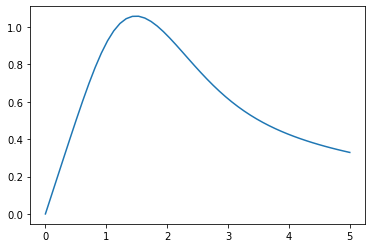

In [9]:
plt.plot(t, y)

#### Example: Damped harmonic oscillator

ODE problems are important in computational science, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. 

To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE. 

As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function:

In [10]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [11]:
# initial state: 
y0 = [1.0, 0.0]

In [12]:
# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

In [13]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

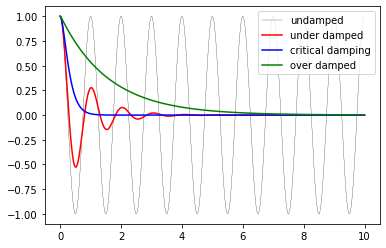

In [14]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend(loc='upper right');

## Exercise 

Evaluate the system of ODEs:
$$\begin{align*}
    x'(t) &= \frac{2}{3}x - \frac{4}{3}xy\\
    y'(t) &= xy - y\\
    x(0) &= 1, \qquad y(0) = 1
\end{align*}$$

from $t = 0$ to $t = 20$. 

Create a plot of time verse $x(t)$ and time verse $y(t)$. 

Create phase plot of $x$ verse $y$

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. 

Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [15]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [16]:
def f(x):
    return x**2 + 10*np.sin(x)

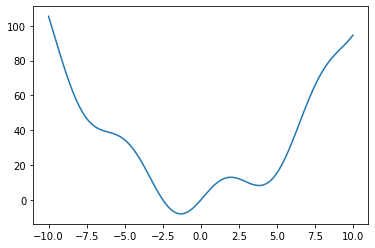

In [17]:
fig, ax  = plt.subplots()
x = np.linspace(-10, 10, 100)
ax.plot(x, f(x));

This function has a global minimum around -1.3 and a local minimum around 3.8.

Searching for minimum can be done with `optimize.minimize()`, given a starting point x0, it returns the location of the minimum that it has found:

In [18]:
result1 = optimize.minimize(f, x0=-4)
result1 

      fun: -7.945823375615279
 hess_inv: array([[0.08579961]])
      jac: array([-1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([-1.30644003])

The result of `optimize.minimize()` is a compound object comprising all information on the convergence

Note that we are not always going to find the global minimum. If we change our initial starting position our minimum will change

In [19]:
result2 = optimize.minimize(f, x0=4)
result2['x']

array([3.83746749])

There are methods for trying to find global minimums but we won't discuss them today. 

## Finding a Root

To find a root, i.e. a point where $f(x) = 0$, of the function $f$ above we can use `scipy.optimize.root()`

In [20]:
root = optimize.root(f, x0=1)  # our initial guess is 1
root    # The full result

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

Note that only one root is found. 

Inspecting the plot of f reveals that there is a second root around -2.5. 

We find the exact value of it by adjusting our initial guess:

In [21]:
root2 = optimize.root(f, x0=-2.5)
root2.x

array([-2.47948183])

Putting it all together we can visualize our results

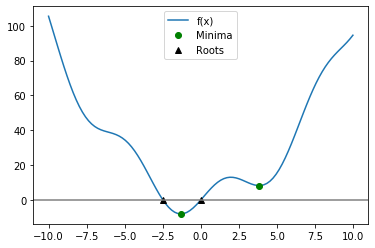

In [22]:
mins = np.array([result1['x'],  result2['x']])

plt.plot(x, f(x), label='f(x)')
plt.plot(mins[0], f(mins[0]), 'go', label='Minima')
plt.plot(mins[1], f(mins[1]), 'go')
plt.plot(root.x, f(root.x), 'k^', label='Roots')
plt.plot(root2.x, f(root2.x), 'k^')
plt.axhline(0, color='gray')
plt.legend();

## Exercise

Let's revisit another old homework problem 

The polynomial $f(x) = 5 x^2 + 9 x - 80$ has a root in the interval $(3,4)$. 

Find the root using your function from above.

##  Curve fitting

Suppose we have data on a sine wave, with some noise:

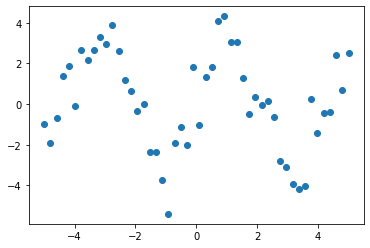

In [23]:
np.random.seed(0)
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

plt.plot(x_data, y_data, 'o')

If we know that the data lies on a sine wave, but not the amplitudes or the period, we can find those by least squares curve fitting. 

First we have to define the test function to fit, here a sine with unknown amplitude and period:

In [24]:
def test_func(x, a, b):
    return a * np.sin(b * x)

We then use `optimize.curve_fit()` to find a and b:

In [25]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print(params)

[3.0593199  1.45754532]


Now we can plot our test function using the fitted parameters

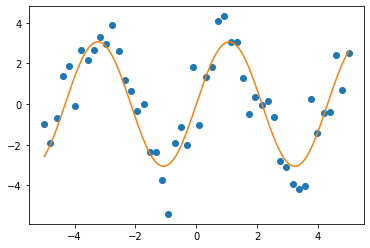

In [26]:
x = np.linspace(x_data.min(), x_data.max(), 200)
plt.plot(x_data, y_data, 'o')
plt.plot(x, test_func(x, params[0], params[1]))

## Exercise

You have collected some data from an experiment which you know follows the form 

$$
f(x) = e^{-ax}\cos(bx)
$$

but you do not know the value of $a$ or $b$. 

Fit the function to the data and create a plot of the data and the fit. 

In [27]:
x_data = np.array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667, 5.        ])
y_data = np.array([ 1.17640523,  0.7707544 ,  0.35389549,  0.00494593, -0.34139062,
       -0.69167134, -0.34420493, -0.17479235,  0.11295719,  0.35086045,
        0.36707616,  0.40931083,  0.17541645, -0.05694585, -0.13725686,
       -0.17598432, -0.00907223, -0.08215067,  0.06990463,  0.02104389,
       -0.13105866,  0.16050284,  0.12461478, -0.09567864,  0.16461648])

## Special functions

A large number of mathematical special functions are important for many computional problems. 

SciPy provides implementations of a very extensive set of special functions. 

For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

In [28]:
from scipy import special

#### Bessel Functions

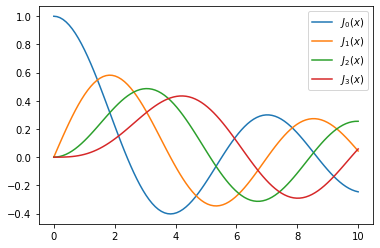

In [29]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, special.jn(n, x), label=f"$J_{n}(x)$")
ax.legend();

#### Gamma Function

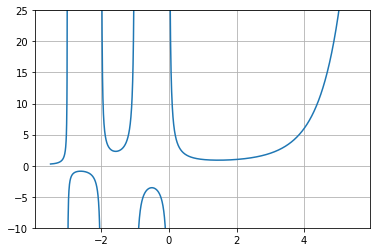

In [30]:
x = np.linspace(-3.5, 5.5, 2251)

fig, ax = plt.subplots()
ax.plot(x, special.gamma(x))
ax.set(ylim=(-10, 25))
ax.grid();